# Computer Vision – Histograms

Entonces, ¿qué es exactamente un histograma? 

Un histograma representa la distribución de las intensidades de píxeles (ya sea color o escala de grises) en una imagen. Se puede visualizar como un gráfico (o gráfico) que proporciona una intuición de alto nivel de la distribución de intensidad (valor de píxel). 

Vamos a asumir un espacio de color RGB en este ejemplo, por lo que estos valores de píxel estarán en el rango de 0 a 255. Al trazar el histograma, el eje X sirve como nuestras "bins o contenedores". Si construimos un histograma con 256 bins, entonces estamos contando efectivamente la cantidad de veces que ocurre cada valor de píxel. Por el contrario, si usamos solo 2 bins, entonces estamos contando el número de veces que un píxel está en el rango [0, 128] o [128, 255]. El número de píxeles agrupados en el valor del eje x se traza en el eje y.

![](images/Imagen2.jpg)

En la Figura anterior, hemos trazado un histograma con 256 bins a lo largo del eje xy el porcentaje de píxeles que caen en las bins dadas a lo largo del eje y. Al examinar el histograma, tener en cuenta que hay tres picos primarios. El primer pico en el histograma es alrededor de x = 20, donde vemos un pico en el número de píxeles, claramente hay algún tipo de objeto en la imagen que tiene un valor muy oscuro. Luego vemos un pico ascendente mucho más lento en el histograma, donde comenzamos a ascender alrededor de x = 50 y finalmente terminamos el descenso alrededor de x = 120. Esta región probablemente se refiere a una región de fondo de la imagen. Finalmente, vemos que hay un número muy grande de píxeles en el rango x = 220 a x = 245. Es difícil decir exactamente qué es esta región, pero debe dominar una gran parte de la imagen.

Al simplemente examinar el histograma de una imagen, obtenemos una comprensión general sobre el contraste, el brillo y la distribución de la intensidad.

### Setup

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Color Histograms

2D histogram shape: (32, 32), with 1024 values
3D histogram shape: (8, 8, 8), with 512 values


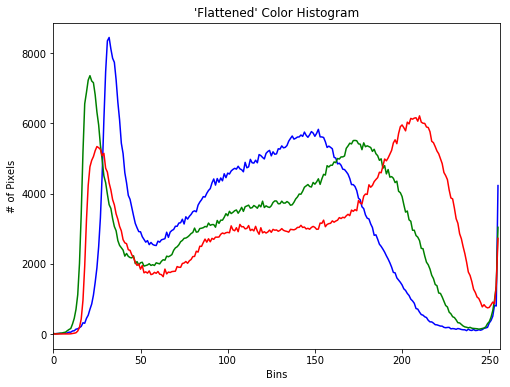

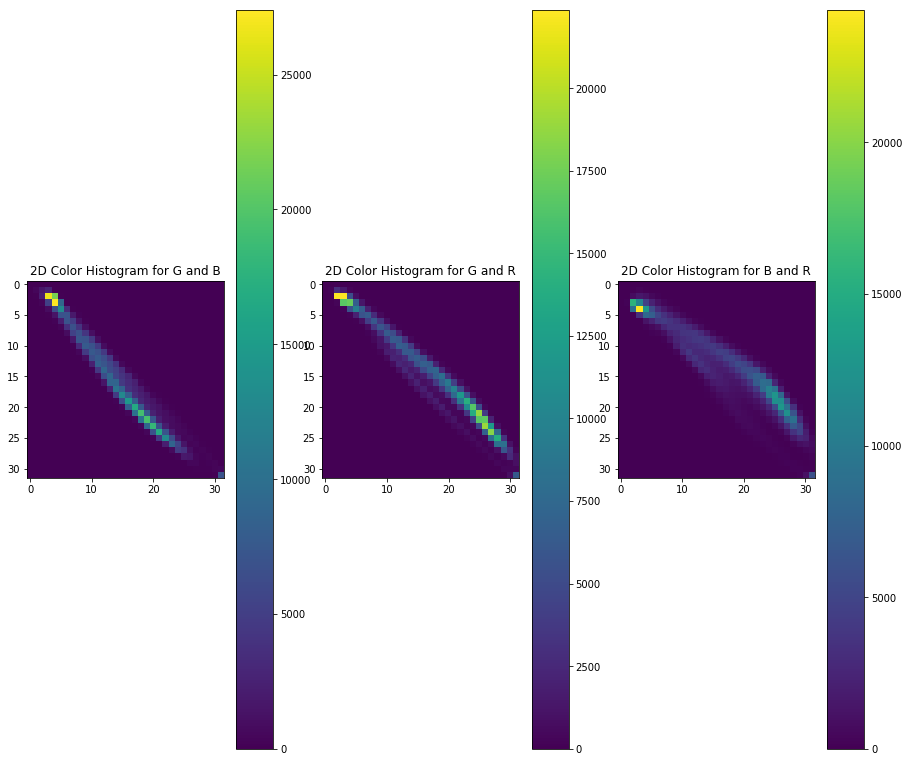

In [2]:
image = cv2.imread("C:/Users/algonzalez/source/repos/Computer_Vision/1_Basics_of_Computer_Vision/images/IMG_1009.JPG")

# Extraer los canales de imagen, inicializar la tupla de colores y la figura
chans = cv2.split(image)
colors = ("b", "g", "r")
plt.figure(figsize=(8, 6))
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

# loop sobre los canales de la imagen
for (chan, color) in zip(chans, colors):
    # crear un histograma para el canal actual y trazarlo
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
    plt.xlim([0, 256])

# Pasemos a los histogramas 2D. Necesitamos reducir el
# número de contenedores en el histograma de 256 a 32 para que podamos
# visualizar mejor los resultados
fig = plt.figure(figsize=(15, 15))

# trazar un histograma de color 2D para verde y azul
ax = fig.add_subplot(131)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None, [32, 32],
    [0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for G and B")
plt.colorbar(p)

# 
ax = fig.add_subplot(132)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None, [32, 32],
    [0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for G and R")
plt.colorbar(p)

# trazar un histograma de color 2D para azul y rojo
ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None, [32, 32],
    [0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for B and R")
plt.colorbar(p)

# finalmente, examinar la dimensionalidad de uno de los 2D histogramas
print("2D histogram shape: {}, with {} values".format(
    hist.shape, hist.flatten().shape[0]))

# nuestro histograma 2D solo pudo tomar en cuenta 2 de los 3
# canales en la imagen, así que ahora vamos a construir un histograma de color 3D
# (utilizando todos los canales) con 8 bins en cada dirección
# no se puede dibujar el histograma 3D, así que solo mostraremos la forma del histograma
hist = cv2.calcHist([image], [0, 1, 2],
    None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print("3D histogram shape: {}, with {} values".format(
    hist.shape, hist.flatten().shape[0]))

plt.show()


## Equalize

La ecualización del histograma mejora el contraste de una imagen al "estirar" la distribución de píxeles. Hay que considerar un histograma con un gran pico en el centro de la misma. La aplicación de la ecualización de histograma extenderá el pico hacia la esquina de la imagen, mejorando así el contraste global de la imagen. La ecualización de histogramas se aplica a imágenes en escala de grises.

In [3]:
image = cv2.imread("C:/Users/algonzalez/source/repos/Computer_Vision/1_Basics_of_Computer_Vision/images/IMG_1009.JPG")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# aplicar ecualización de histograma para estirar el contraste de nuestra imagen
eq = cv2.equalizeHist(image)

# mostrar nuestras imágenes: observar cómo el contraste de la segunda imagen tiende ha estirarse
cv2.imshow("Original", image)
cv2.imshow("Histogram Equalization", eq)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Grayscale Histograms

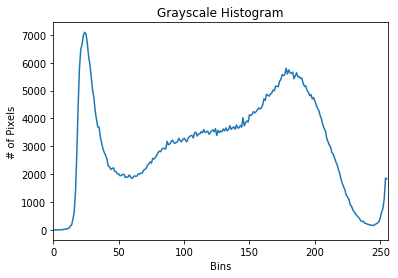

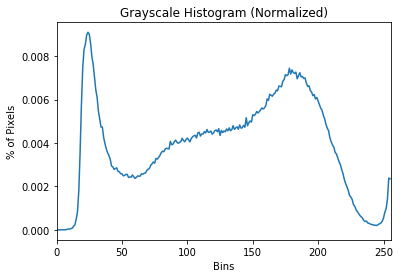

In [4]:
image = cv2.imread("C:/Users/algonzalez/source/repos/Computer_Vision/1_Basics_of_Computer_Vision/images/IMG_1009.JPG")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Contruir un histograma de escala de grises
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

# Normalizar el histograma
hist /= hist.sum()

# Histograma normalizdo
plt.figure()
plt.title("Grayscale Histogram (Normalized)")
plt.xlabel("Bins")
plt.ylabel("% of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

## Histogram by mask

In [5]:
def plot_histogram(image, title, mask=None):
    # Extraer los canales de imagen, inicializar la tupla de colores y la figura
    chans = cv2.split(image)
    colors = ("b", "g", "r")
    plt.figure()
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")

    # loop sobre los canales de la imagen
    for (chan, color) in zip(chans, colors):
        # crear un histograma para el canal actual y trazarlo
        hist = cv2.calcHist([chan], [0], mask, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.xlim([0, 256])

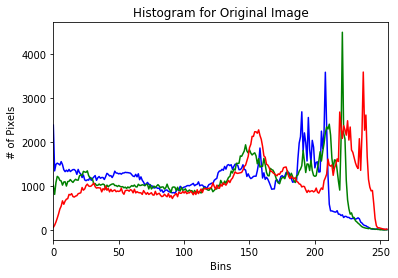

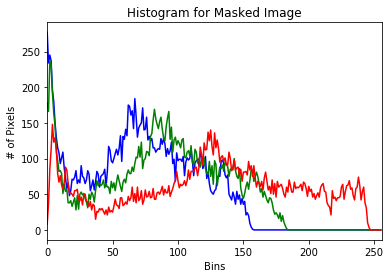

In [6]:
# Cargar imagen y trazar un histograma para ello.
image = cv2.imread("C:/Users/algonzalez/source/repos/Computer_Vision/1_Basics_of_Computer_Vision/images/file.jpeg")
plot_histogram(image, "Histogram for Original Image")

# construir una máscara para nuestra imagen - nuestra máscara será NEGRA para las regiones
# queremos IGNORAR y BLANCO para las regiones que queremos EXAMINAR
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (60, 290), (210, 390), 255, -1)
cv2.imshow("Mask", mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

# ¿Cómo se veria enmascarar nuestra imagen?
masked = cv2.bitwise_and(image, image, mask=mask)
cv2.imshow("Applying the Mask", masked)
cv2.waitKey(0)
cv2.destroyAllWindows()

# calcular un histograma para nuestra imagen, pero solo incluiremos píxeles en
# la región enmascarada
plot_histogram(image, "Histogram for Masked Image", mask=mask)

plt.show()